### Two-sample z-test for means
Use only when the sample size is at least 30 (i.e. n>=30) AND population standard deviation is known (which usually we do not know). Otherwise use the t-test.  

In [1]:
z.test2sam = function(ma, mb, na, nb, var.a, var.b){
  zeta = (ma-mb) / (sqrt(var.a/na + var.b/nb))
  return(zeta)
}

ma = 3.77
mb = 3.31
na = 109
nb = 222
var.a = 1.015^2
var.b = 1.297^2
z.test2sam(ma, mb, na, nb, var.a, var.b)  
# reject the null hyothesis that the differences in the means of the two samples are statistically signficant 
# if the value returned is >1.96
# i.e. in this case we conclude that there is insufficient evidence that the differences in the two samples are due to chance. 

[1] 3.525021

### Two-sample t-test for means
Use when the sample size is less than 30 OR population standard deviation is unknown.

In [2]:
y1 <- rnorm(10, 3, 10)
y2 <- rnorm(10, 4, 12)
y1[1:5]
y2[1:5]
# Assumes the two samples have equal variances
t.test(y1, y2, var.equal=TRUE)

[1]  15.15476   5.62241  11.26425 -12.39300  10.05260

[1]   5.527834 -24.413639  -7.201372   2.008961   5.922128


	Two Sample t-test

data:  y1 and y2
t = 1.3517, df = 18, p-value = 0.1932
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.871245 17.839575
sample estimates:
mean of x mean of y 
 5.278885 -1.705280 


In [3]:
t.test(y1, y2, var.equal=FALSE)


	Welch Two Sample t-test

data:  y1 and y2
t = 1.3517, df = 17.84, p-value = 0.1934
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.878245 17.846576
sample estimates:
mean of x mean of y 
 5.278885 -1.705280 


### Paired t-test for means
Use when you are comparing two values (eg. measurement before and after treatment) of the same sample

In [4]:
y1 <- rnorm(100, 3, 10)
y2 <- rnorm(100, 3.5, 10)
t.test(y1, y2, paired = TRUE)


	Paired t-test

data:  y1 and y2
t = 1.1901, df = 99, p-value = 0.2369
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.054143  4.213567
sample estimates:
mean of the differences 
               1.579712 


In [5]:
mean(y2-y1)

[1] -1.579712

In [6]:
var(y2-y1)

[1] 176.1998

In [7]:
# computing the t-statistic of the sample difference
mean = mean(y2-y1)
n = 100
sed = var(y2-y1)/sqrt(n)
t = mean/sed
t
# t-statistic at 95% confidence interval for n=10 is 2.228
# if |t| > 2.228, reject null hypothesis that the differences are statistically significant

[1] -0.08965459

### Two-sample chi-square test for proportions

,1,2
Y,27,10
N,15,11



	Pearson's Chi-squared test with Yates' continuity correction

data:  data
X-squared = 0.99051, df = 1, p-value = 0.3196


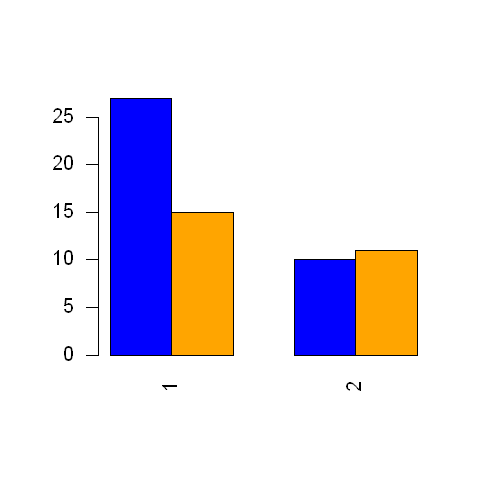

In [8]:
freqs = c(27,15,10,11)
data = matrix(freqs, nrow=2)
dimnames(data) = list("status"=c("Y","N"), "Type"=c("1","2"))

data

result <- chisq.test(data)
result

options(repr.plot.width=4, repr.plot.height=4)
toplot<- as.matrix(rbind(data[1,],data[2,] ))
barplot(toplot, beside = TRUE, col = c("blue", "orange"), las=2)

In [9]:
# alternative function
prop.test(x = c(27, 10), n = c(27+15, 10+11))


	2-sample test for equality of proportions with continuity correction

data:  c(27, 10) out of c(27 + 15, 10 + 11)
X-squared = 0.99051, df = 1, p-value = 0.3196
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.1271700  0.4605034
sample estimates:
   prop 1    prop 2 
0.6428571 0.4761905 


### Three-sample chi-square test for proportions

In [10]:
freqs = c(27,15,10,11,20,25)
data = matrix(freqs, nrow=2)
dimnames(data) = list("status"=c("Y","N"), "Type"=c("1","2","3"))

data

result <- chisq.test(data)
result

,1,2,3
Y,27,10,20
N,15,11,25



	Pearson's Chi-squared test

data:  data
X-squared = 3.7099, df = 2, p-value = 0.1565


In [11]:
prop.test(x = c(27, 10, 20), n = c(27+15, 10+11, 45))


	3-sample test for equality of proportions without continuity
	correction

data:  c(27, 10, 20) out of c(27 + 15, 10 + 11, 45)
X-squared = 3.7099, df = 2, p-value = 0.1565
alternative hypothesis: two.sided
sample estimates:
   prop 1    prop 2    prop 3 
0.6428571 0.4761905 0.4444444 


In [12]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [13]:
?mtcars

In [14]:
x <- mtcars[1:3]
y <- mtcars[4:6]
cor(x, y)

,hp,drat,wt
mpg,-0.7761684,0.6811719,-0.8676594
cyl,0.8324475,-0.6999381,0.7824958
disp,0.7909486,-0.7102139,0.8879799


In [15]:
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.3.3"corrplot 0.84 loaded


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


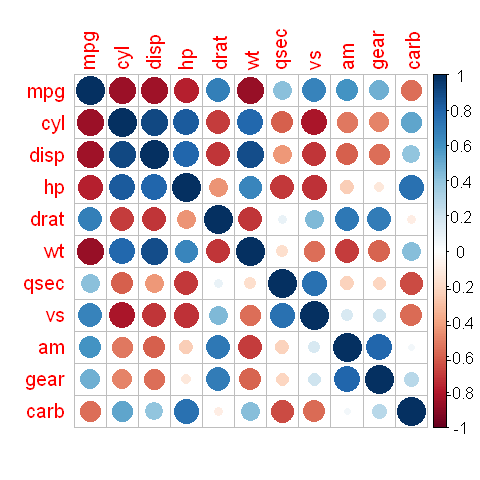

In [16]:
M <- cor(mtcars)
M
corrplot(M, method = "circle")

#### References: 
https://www.statmethods.net/stats/ttest.html  
http://www.stat.columbia.edu/~martin/W2024/R2.pdf  
http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf (T-statistic table)  
https://www.statmethods.net/stats/correlations.html  
https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html